In [2]:
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

#model metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# RFE 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#Hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:

def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    name = model.__class__.__name__
    train_pred = model.predict(x)
    
    ac = accuracy_score(y,train_pred)
    print('Accuracy is: ', ac)
    
    class_rep = classification_report(y,train_pred)
    print("Classification Report:\n",class_rep)
    
    score = model.score(x ,y)
    print('score is: ', score)
    
    cross_val = cross_val_score(model, x, np.ravel(y))
    print("Cross Validation: {}",cross_val)
    
    print ("\n")
    print (pd.crosstab(pd.Series(train_pred, name='Predicted'),
                       pd.Series(y['DEFAULT'],name='DEFAULT')))
    return 1

In [4]:

##################################################
##         Import and Prepare the Data          ##
##################################################

defaultCredit= pd.read_csv('dataset/defaultCreditCardClients.csv')
defaultCredit = defaultCredit.drop(defaultCredit.columns[0], axis=1)
#defaultCredit.info()


defaultCredit['DEFAULT'] = defaultCredit['DEFAULT'].astype('category')

In [5]:
defaultCredit['SEX'] = defaultCredit['SEX'].astype('category')
defaultCredit['EDUCATION'] = defaultCredit['EDUCATION'].astype('category')
defaultCredit['MARRIAGE'] = defaultCredit['MARRIAGE'].astype('category')
defaultCredit['PAY_1'] = defaultCredit['PAY_1'].astype('category')
defaultCredit['PAY_2'] = defaultCredit['PAY_2'].astype('category')
defaultCredit['PAY_3'] = defaultCredit['PAY_3'].astype('category')
defaultCredit['PAY_4'] = defaultCredit['PAY_4'].astype('category')
defaultCredit['PAY_5'] = defaultCredit['PAY_5'].astype('category')
defaultCredit['PAY_6'] = defaultCredit['PAY_6'].astype('category')

In [78]:
# RFE Do now run again
# https://www.youtube.com/watch?v=xlHk4okO8Ls
target = 'DEFAULT'
X = defaultCredit.loc[:, defaultCredit.columns != target]
Y = defaultCredit.loc[:, defaultCredit.columns == target]
#X.shape
#Y.shape

clf = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [79]:
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(x_train, np.ravel(y_train))


In [80]:
print('Optimal number of features: ',rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])


Optimal number of features:  6
Best features:  Index(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT2', 'PAY_AMT1'], dtype='object')


In [81]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

print(x_train_rfecv)

[[1 2 3 2 63007 5200]
 [0 0 0 -2 9378 1000]
 [-1 0 -1 -1 13050 1105]
 ...
 [0 0 0 0 48381 2002]
 [0 0 0 0 28530 2000]
 [-2 -2 -2 -2 25790 25794]]


In [82]:
rfecv_model = clf.fit(x_train_rfecv, np.ravel(y_train))
generate_accuracy_and_heatmap(rfecv_model, x_test_rfecv, y_test)

Accuracy is:  0.8208
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.37      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

score is:  0.8208
Cross Validation: {} [0.82266667 0.80933333 0.808      0.822      0.80133333]


DEFAULT       0    1
Predicted           
0          1269  342
1           201   42


1

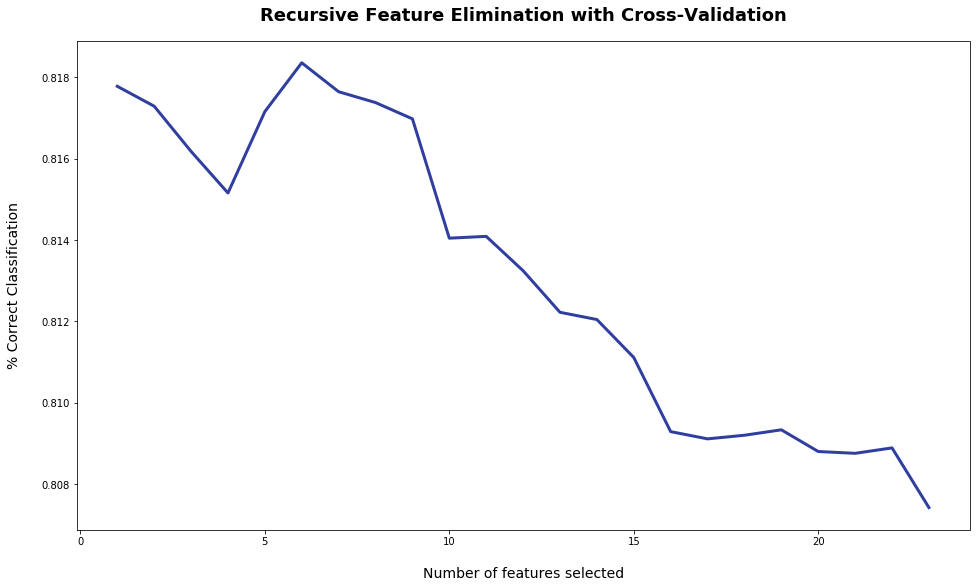

In [83]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

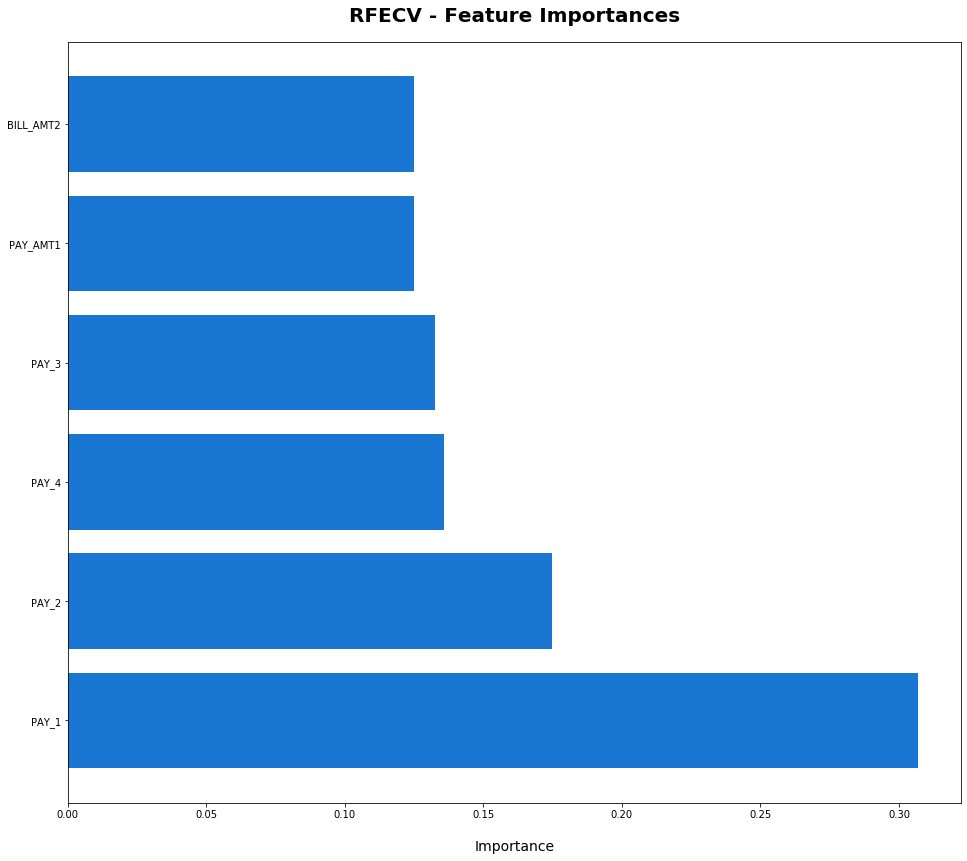

In [84]:
dset = pd.DataFrame()
dset['attr'] = x_train.columns[np.where(rfecv.support_ == True)[0]]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
dset

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [85]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)


In [86]:
rfecv_model = clf.fit(x_train_rfecv, np.ravel(y_train))

In [87]:
#Accuracy is:  0.8176
generate_accuracy_and_heatmap(rfecv_model, x_test_rfecv, y_test)


Accuracy is:  0.8192
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.65      0.35      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

score is:  0.8192
Cross Validation: {} [0.82266667 0.812      0.80666667 0.82666667 0.80733333]


DEFAULT       0    1
Predicted           
0          1279  342
1           191   42


1

In [92]:
#Accuracy is:  0.8226666666666667
gbc_clf = GradientBoostingClassifier()
gbc_model = gbc_clf.fit(x_train_rfecv, np.ravel(y_train))
generate_accuracy_and_heatmap(gbc_model, x_test_rfecv, y_test)


Accuracy is:  0.8226666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      5873
           1       0.66      0.38      0.48      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500

score is:  0.8226666666666667
Cross Validation: {} [0.83333333 0.81666667 0.812      0.832      0.81466667]


DEFAULT       0    1
Predicted           
0          1263  337
1           207   47


1